In [1]:
import scipy.io
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import random
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the file paths for the image and ground truth data
image_path = r'C:\Users\86158\Desktop\DTS201\DTS201TC CW DATASET\PaviaU.mat'
gt_path = r'C:\Users\86158\Desktop\DTS201\DTS201TC CW DATASET\PaviaU_gt.mat'

# Load the image data
image = scipy.io.loadmat(image_path)
image = image['paviaU']  # Read the image data

# Load the ground truth data (assuming the ground truth is a single-channel grayscale image)
ground_truth = scipy.io.loadmat(gt_path)
ground_truth = ground_truth['paviaU_gt']  # Read the ground truth data

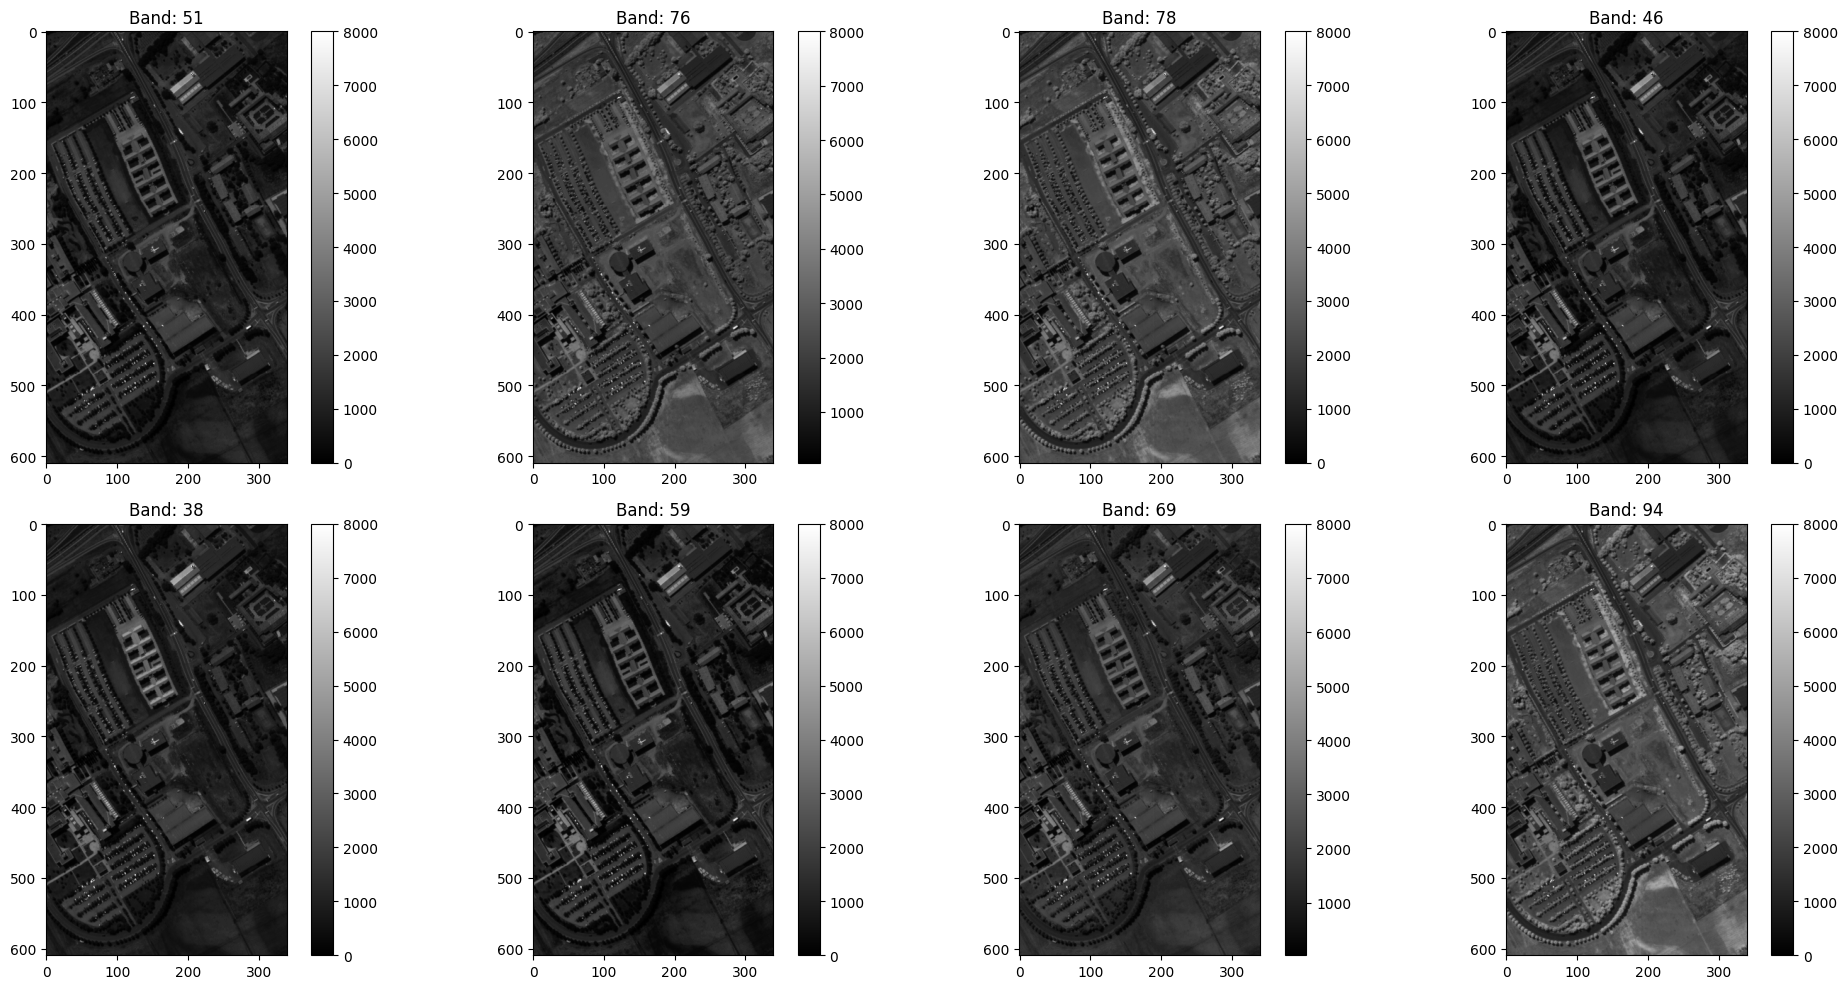

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Randomly select 8 bands from the image data
bands_to_visualize = np.random.choice(image.shape[2], 8, replace=False)

# Set the figure size for visualization
plt.figure(figsize=(20, 10))

# Loop through and plot the selected bands
for i, band in enumerate(bands_to_visualize, 1):
    plt.subplot(2, 4, i)
    plt.imshow(image[:, :, band], cmap='gray')
    plt.colorbar()
    plt.title(f'Band: {band}')

# Adjust the layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

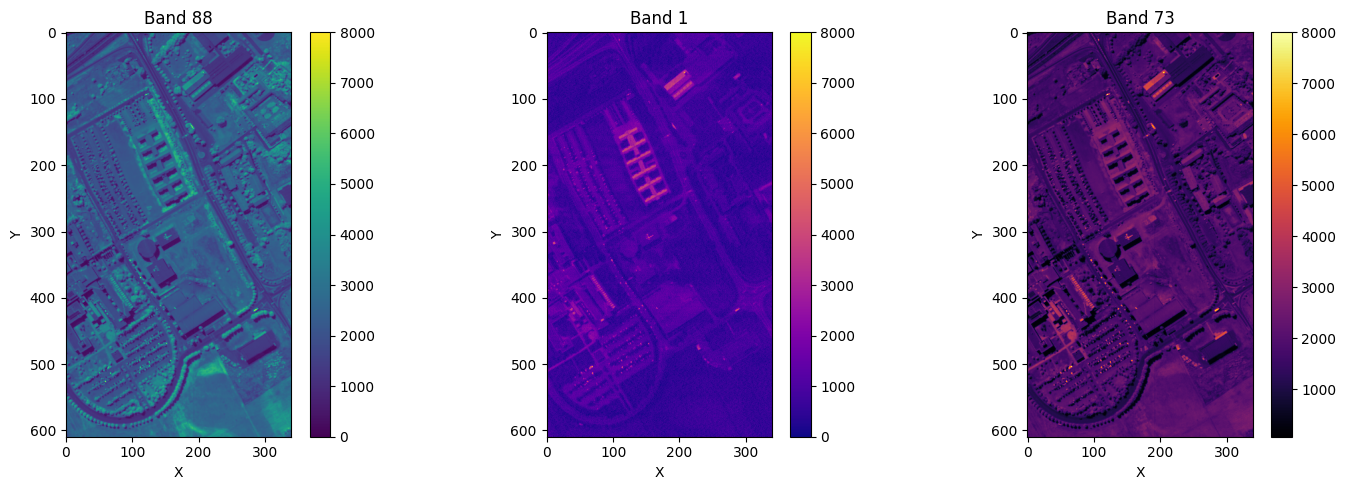

In [3]:
import random

# Initialize an empty list to store the randomly selected band numbers
selected_bands = random.sample(range(image.shape[2]), 3)

# Create a single row with 3 subplots for the selected bands
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create a list of color maps for the selected bands
color_maps = ['viridis', 'plasma', 'inferno']  # You can choose different colormaps

# Iterate through the selected bands and plot them
for i, band_num in enumerate(selected_bands):
    ax = axes[i]
    im = ax.imshow(image[:, :, band_num], cmap=color_maps[i])
    ax.set_title('Band {}'.format(band_num))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)  # Add colorbar to each subplot

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

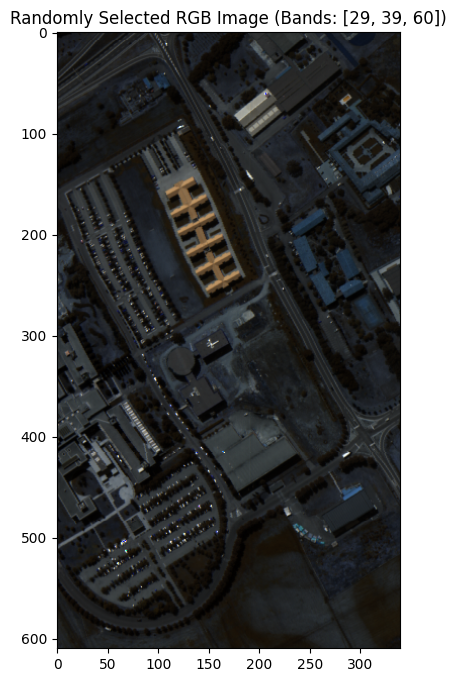

In [4]:
# Import the random library
import random

# Randomly select 3 band indices
selected_bands = random.sample(range(image.shape[2]), 3)  # Randomly select 3 bands from the number of bands in the image

# Extract the selected bands from the image data
rgb_image = image[:, :, selected_bands]

# Normalize the RGB image to the [0, 1] range
rgb_image_normalized = (rgb_image - np.min(rgb_image)) / (np.max(rgb_image) - np.min(rgb_image))

# Display the RGB image
plt.figure(figsize=(10, 8))
plt.imshow(rgb_image_normalized)
plt.title(f'Randomly Selected RGB Image (Bands: {selected_bands})')
plt.show()

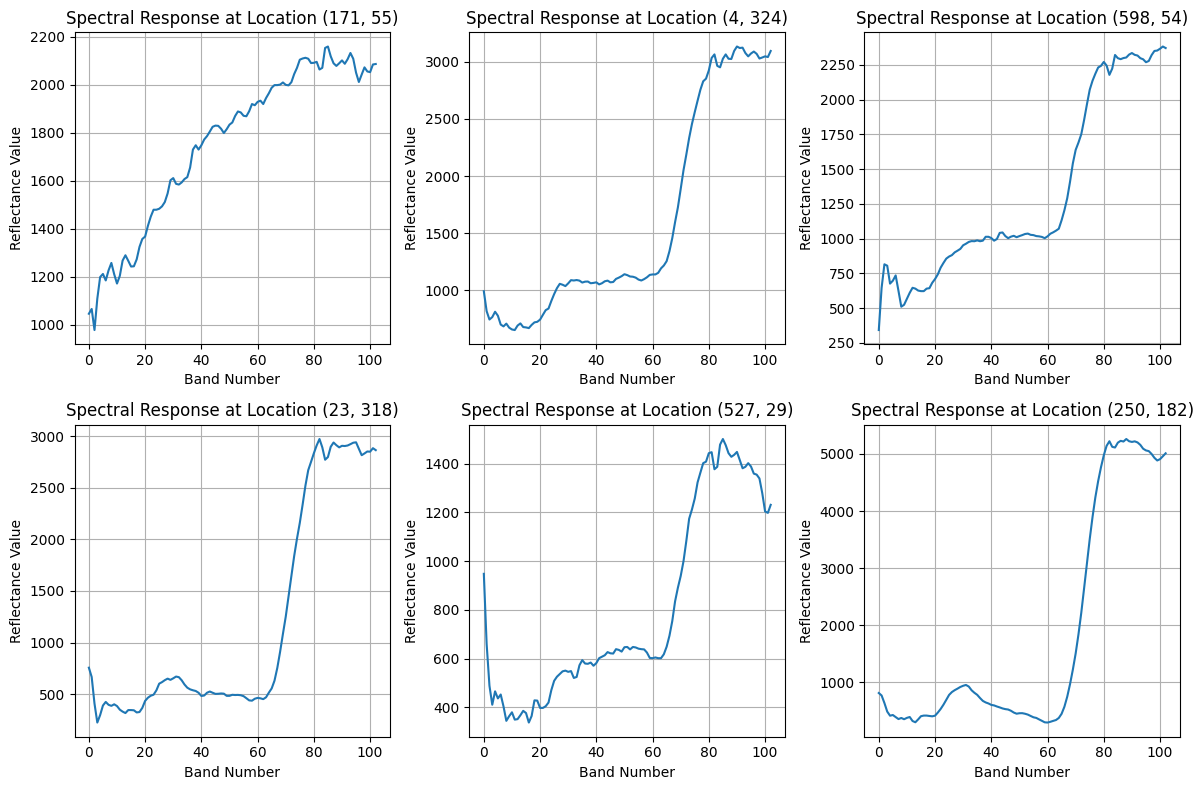

In [5]:
import random

# Initialize an empty list to store the randomly selected locations
locations = []

# Generate 6 unique random locations
while len(locations) < 6:
    location = (random.randint(0, image.shape[0] - 1), random.randint(0, image.shape[1] - 1))
    if location not in locations:
        locations.append(location)

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Iterate through the locations and plot their spectral responses
for i, location in enumerate(locations):
    row, col = divmod(i, 3)  # Calculate the row and column for the subplot
    spectrum = image[location[0], location[1], :]
    
    # Plot the spectrum in the corresponding subplot
    ax = axes[row, col]
    ax.plot(spectrum)
    ax.set_title('Spectral Response at Location {}'.format(location))
    ax.set_xlabel('Band Number')
    ax.set_ylabel('Reflectance Value')
    ax.grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

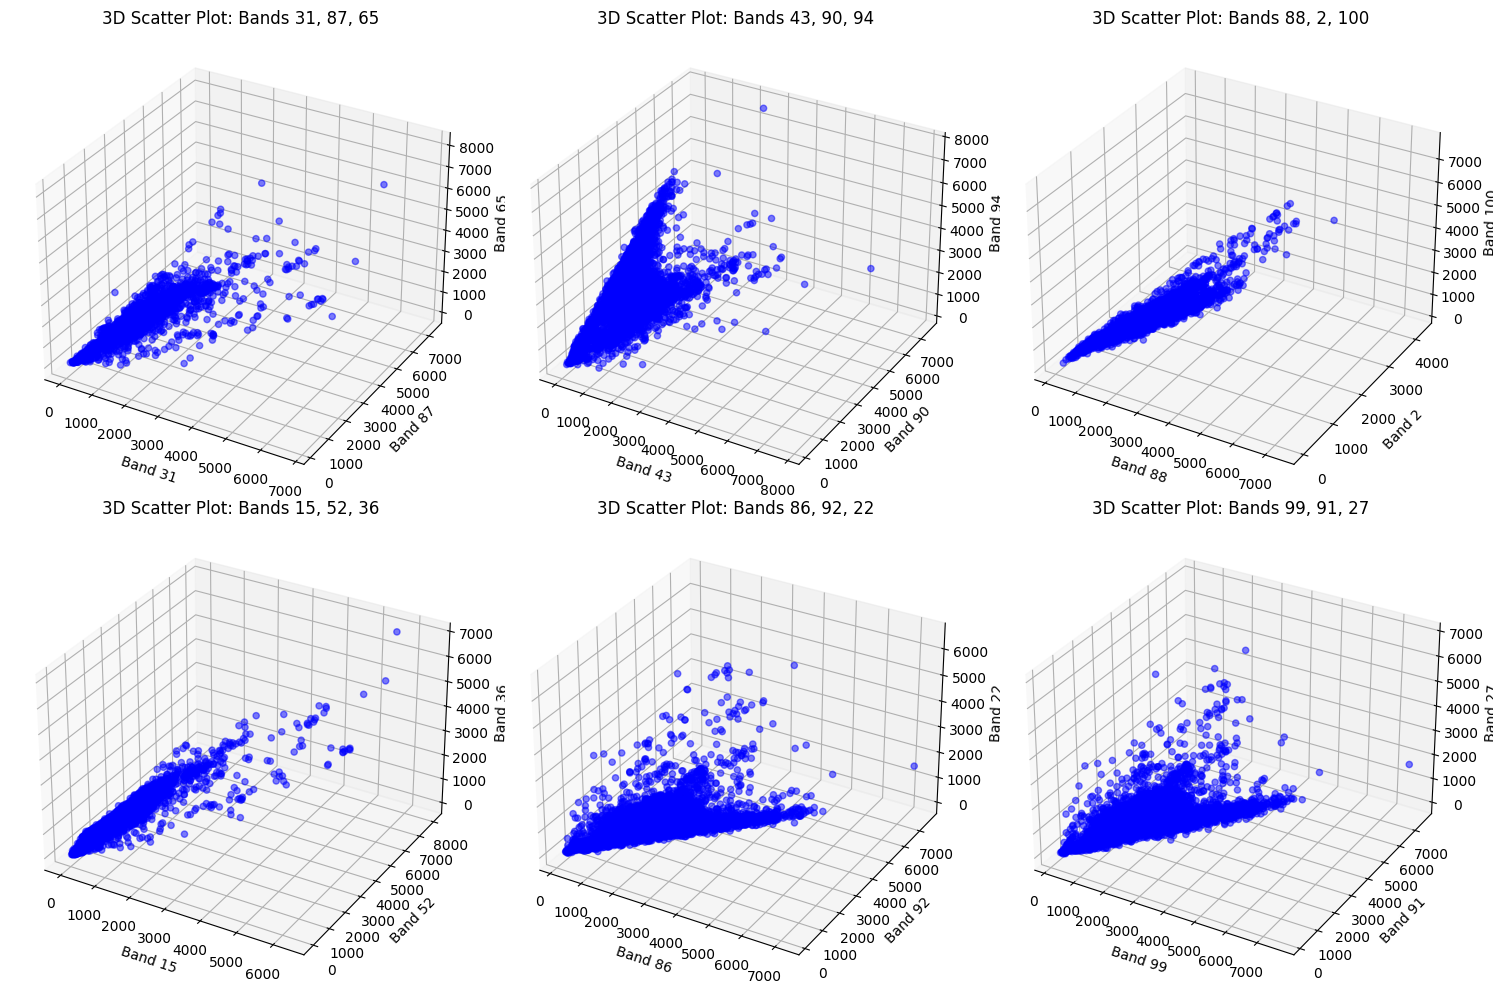

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import random

# Get the shape of the image and the number of bands.
image_shape = image.shape
num_bands = image_shape[2]

# Create a 2x3 subplot layout.
fig, axs = plt.subplots(2, 3, figsize=(15, 10), subplot_kw={'projection': '3d'})

# Randomly select some pixels from the image (5000 in this case, you can adjust as needed).
num_samples = 5000
indices = np.random.choice(image_shape[0] * image_shape[1], num_samples, replace=False)
samples = image.reshape(-1, num_bands)[indices]

# For each subplot, randomly choose three bands and plot a 3D scatter plot.
for i in range(2):
    for j in range(3):
        ax = axs[i, j]
        
        # Randomly select three bands.
        bands = random.sample(range(num_bands), 3)
        
        # Create a 3D scatter plot.
        ax.scatter(samples[:, bands[0]], samples[:, bands[1]], samples[:, bands[2]], c='b', marker='o', alpha=0.5)
        ax.set_xlabel(f'Band {bands[0]}')
        ax.set_ylabel(f'Band {bands[1]}')
        ax.set_zlabel(f'Band {bands[2]}')
        ax.set_title(f'3D Scatter Plot: Bands {bands[0]}, {bands[1]}, {bands[2]}')

# Adjust the layout and display the plot.
plt.tight_layout()
plt.show()

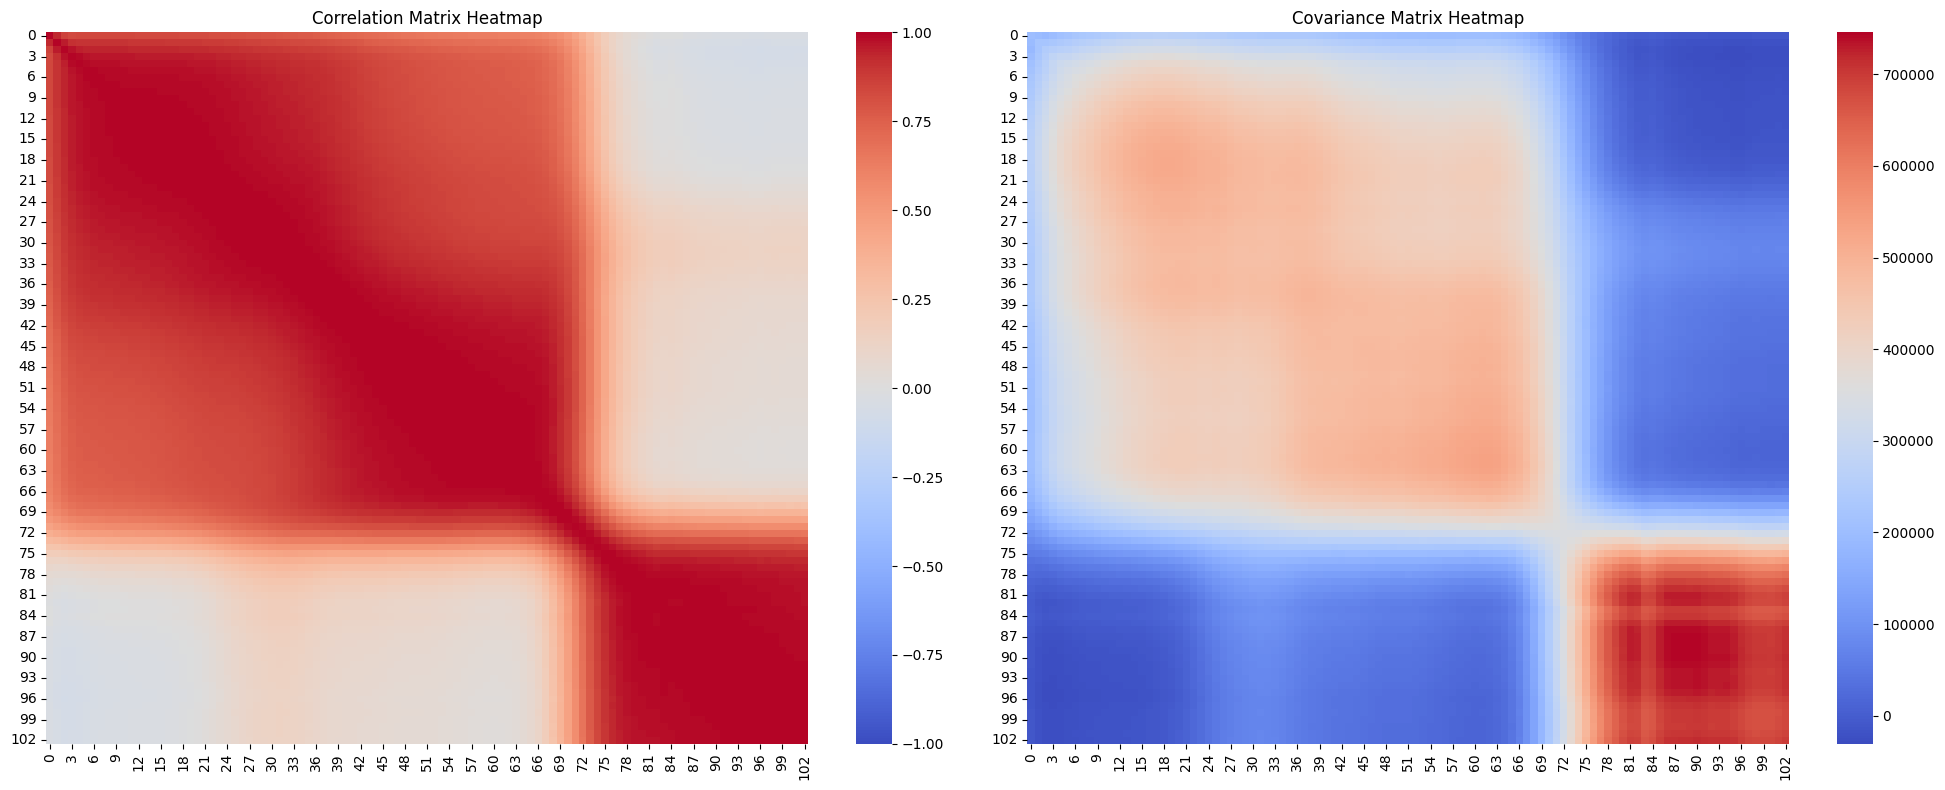

In [7]:
import networkx as nx

# Randomly select some pixels from the image (10000 in this case, you can adjust as needed).
num_samples_network = 10000
indices_network = np.random.choice(image.shape[0] * image.shape[1], num_samples_network, replace=False)
samples_network = image.reshape(-1, image.shape[2])[indices_network]

# Calculate the correlation matrix and covariance matrix.
correlation_matrix = np.corrcoef(samples_network, rowvar=False)
covariance_matrix = np.cov(samples_network, rowvar=False)

# Create a canvas with two subplots, one row and two columns.
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot a heatmap of the correlation matrix.
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title('Correlation Matrix Heatmap')

# Plot a heatmap of the covariance matrix.
sns.heatmap(covariance_matrix, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Covariance Matrix Heatmap')

# Adjust the spacing between subplots.
plt.tight_layout()

# Display the canvas.
plt.show()

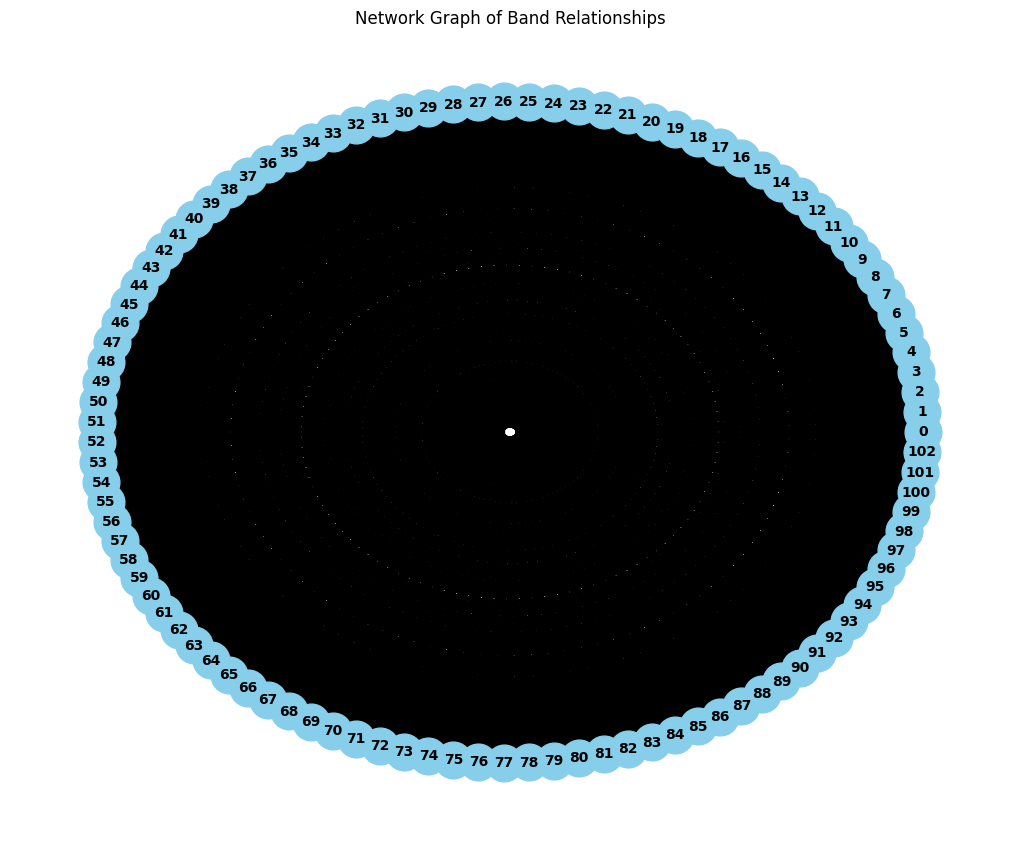

In [8]:
# Create a network graph to display relationships between bands.
G = nx.Graph()

# Add nodes and edges to the graph.
for i in range(num_bands):
    G.add_node(i)
    for j in range(i + 1, num_bands):
        # Use the absolute value of the correlation as the edge weight.
        G.add_edge(i, j, weight=abs(correlation_matrix[i, j]))

# Draw the network graph.
pos = nx.circular_layout(G)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=10)
plt.title('Network Graph of Band Relationships')
plt.show()

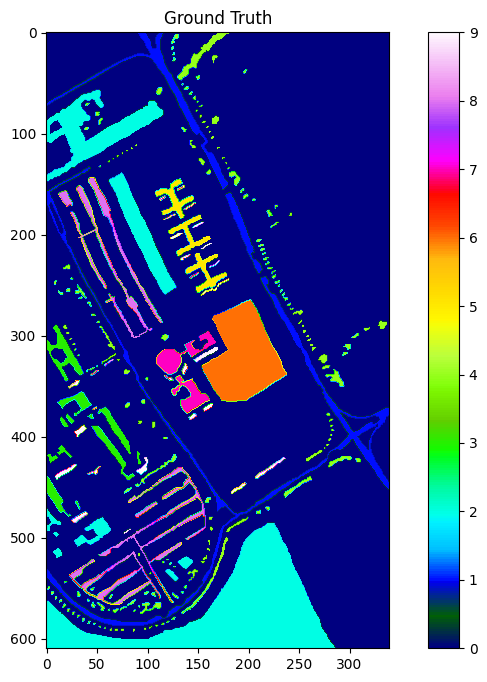

In [9]:
# Choose a colormap for visualization
cmap = plt.get_cmap('gist_ncar')

# Plot the Ground Truth image
plt.figure(figsize=(10, 8))
plt.imshow(ground_truth, cmap=cmap, vmin=0, vmax=9)  # Assuming class labels range from 0 to 9
plt.colorbar()
plt.title('Ground Truth')
plt.show()

C:\Users\86158\AppData\Local\Temp\ipykernel_31984\778384852.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'Band_{band + 1}'] = image[:, :, band].ravel()
C:\Users\86158\AppData\Local\Temp\ipykernel_31984\778384852.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'Band_{band + 1}'] = image[:, :, band].ravel()
C:\Users\86158\AppData\Local\Temp\ipykernel_31984\778384852.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

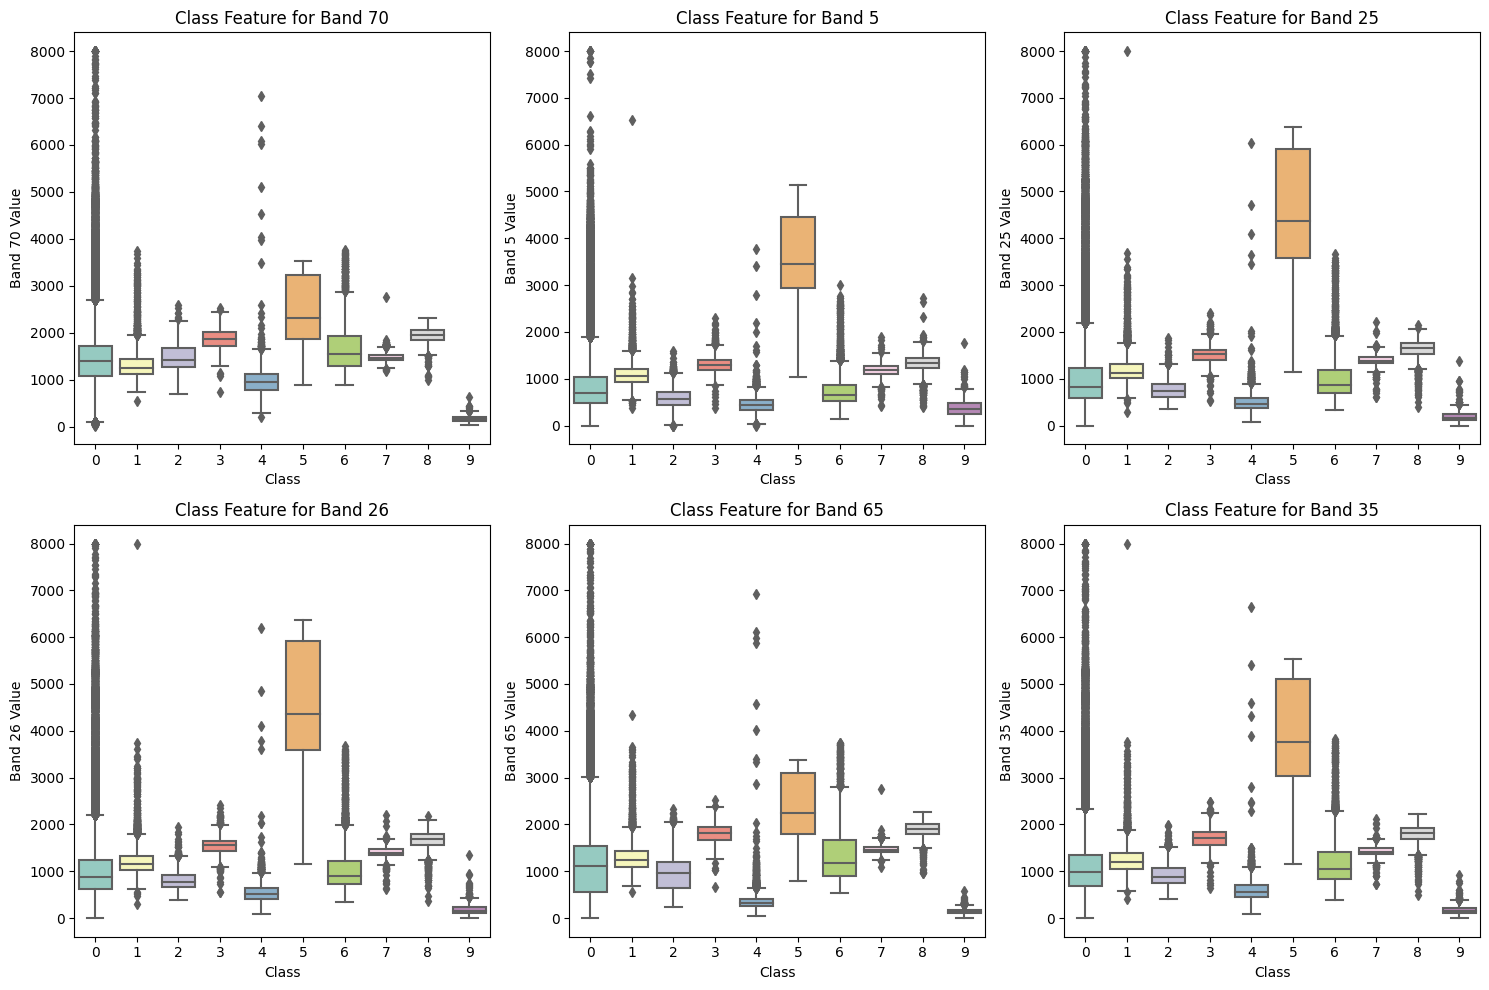

In [10]:
import pandas as pd

# Combine image and ground truth data into a DataFrame
data = pd.DataFrame({'Class': ground_truth.ravel()})
for band in range(image.shape[2]):
    data[f'Band_{band + 1}'] = image[:, :, band].ravel()

# Randomly select 6 different bands
random_bands = random.sample(range(image.shape[2]), 6)

# Create a 2x3 subplot layout
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, band in enumerate(random_bands):
    row, col = divmod(i, 3)  # Calculate the row and column for the subplot
    sns.boxplot(x='Class', y=f'Band_{band + 1}', data=data, palette='Set3', ax=axes[row, col])
    axes[row, col].set_title(f'Class Feature for Band {band + 1}')
    axes[row, col].set_xlabel('Class')
    axes[row, col].set_ylabel(f'Band {band + 1} Value')

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

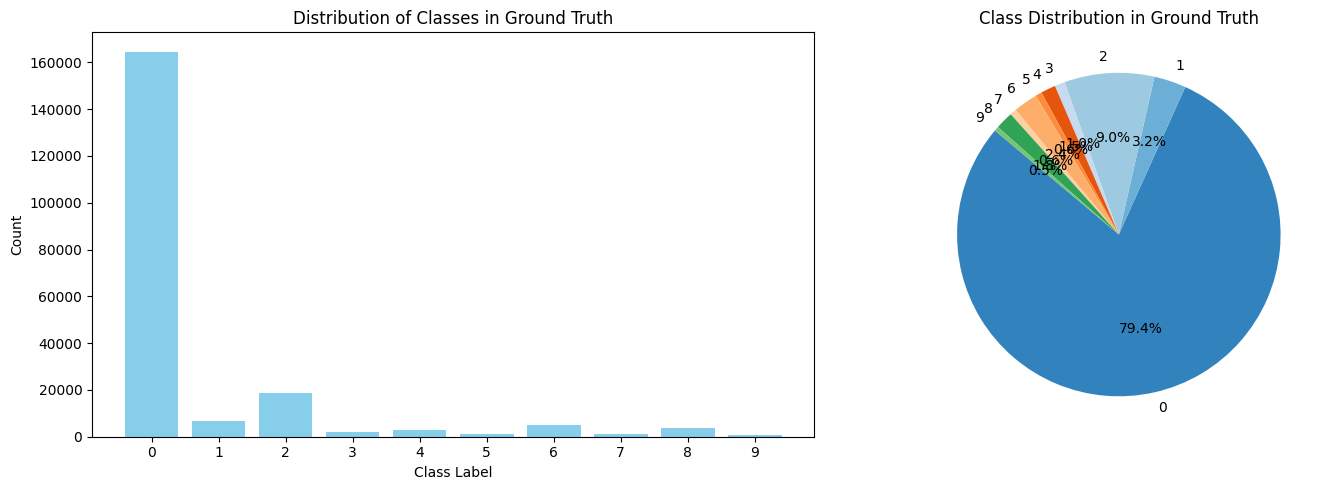

In [12]:
# Your code to calculate unique class counts and plot the bar chart
unique, counts = np.unique(ground_truth, return_counts=True)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the bar chart in the first subplot
axes[0].bar(unique, counts, color='skyblue')
axes[0].set_xlabel('Class Label')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Classes in Ground Truth')
axes[0].set_xticks(unique)

# Plot the pie chart in the second subplot
axes[1].pie(counts, labels=unique, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20c.colors)
axes[1].set_title('Class Distribution in Ground Truth')

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

In [13]:
# Flatten the 103 feature dimensions of the image into a 1D vector
image_data = image.reshape(-1, 103)

# Flatten the ground truth data into a 1D vector
gt_data = ground_truth.reshape(-1)

# Get the indices of pixels with non-zero labels
non_zero_indices = np.where(gt_data != 0)

# Extract data for pixels with non-zero labels
image_data_non_zero = image_data[non_zero_indices]
gt_data_non_zero = gt_data[non_zero_indices]

# Print the shapes of the non-zero data
print("image_data_non_zero:", image_data_non_zero.shape)
print("gt_data_non_zero:", gt_data_non_zero.shape)

image_data_non_zero: (42776, 103)
gt_data_non_zero: (42776,)


In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(image_data_non_zero, gt_data_non_zero, test_size=0.2, random_state=100, stratify=gt_data_non_zero)

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=10)  # You can choose different kernels and parameters

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear', 'sigmoid', 'poly'],
    'gamma': [0.01, 0.1, 1, 10, 'auto', 'scale'],
}

# Use GridSearchCV for cross-validation and parameter tuning
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)  # Using 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

# Make predictions using the model with the best parameters
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.96
Accuracy on the test set: 0.96
